## Road Lane Detection using OpenCV

Using concepts, we will build lane detection project. We will first do it on image and then on video.

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [95]:
#load an image

image = cv.imread('road4.png')

In [96]:
#conver to RGB image

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

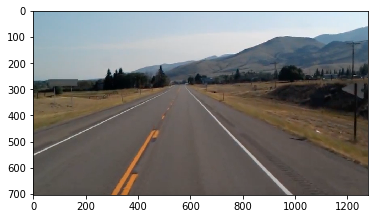

In [97]:
plt.imshow(image_rgb)
plt.show()

In [98]:
image_rgb.shape

(704, 1279, 3)

In [99]:
# we read the image from top(0) to bottom(704) for height and left to right for width

height = image_rgb.shape[0]
width = image_rgb.shape[1]

print(height)
print(width)

704
1279


## Part 1 - Identify Area of Interest by Masking the Image: 
we need to define region of interest vertices. We will provide 3 point of interest, Left botton(0,704) right bottom and somewhere in middle where the lane is lines appear to be merging at center(approx 600,300)

In [100]:
#region_of interest variable

region_of_interest_vertices = [(0,height), (width/2,height/2), (width, height)]
print(region_of_interest_vertices)

[(0, 704), (639.5, 352.0), (1279, 704)]


#### Mask ever other region outside region of interest

we create the fuction for region of interest, which will take input image and vertices.
1. define a mask variable as blank matrix that matches the  image height and width.
2. retrive number of color channel, from the image.shape
3. create a match color using the same color channel count
4. Fill inside the polygon using fill polly method, as we have region of interest and mask every other thing on image outside region of interest. values:(image(mask), vertices(points),color)
5. Return the image where ONLY mark pixels matches, using bitwise_AND method. values(image, mask)

So basically, we apply region of interest using this method aand we get region where other area will me masked

In [101]:
def region_of_interest(img, vertices):
    
    #blank image
    mask = np.zeros_like(img)
    
    #color channel same as image
    channel_count = img.shape[2]
    
    #create color mask
    match_mask_color = (255,) * channel_count
    
    #fill everything except area of interest
    cv.fillPoly(mask, vertices, match_mask_color)
    
    #overlay mask image on image and return ONLY common area
    masked_image = cv.bitwise_and(img, mask)
    
    return masked_image
    

### Debugging the above method

In [45]:

mask = np.zeros_like(image)

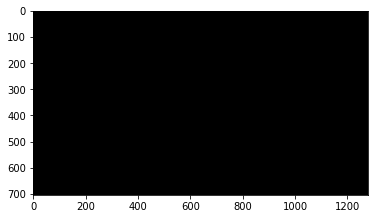

In [62]:
plt.imshow(mask)

In [63]:
match_mask_color = (255,) * 3

In [68]:
fill = cv.fillPoly(mask, np.array([[(0,700),(600,350),(1200,700)]], dtype = np.int32), match_mask_color)

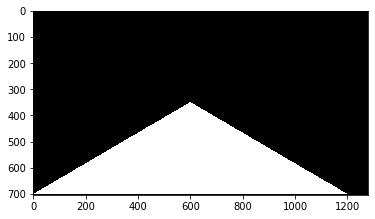

In [69]:
plt.imshow(fill)

### Now, use the above function to mask original image.

In [102]:
#pass our image to the function and save it as masked image, and 
# vertices will be the region_of_interest variable will pass using numpy array method.

cropped_image = region_of_interest(image, 
                                   np.array([region_of_interest_vertices], np.int32))

In [103]:
cv.imshow('masked image', cropped_image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

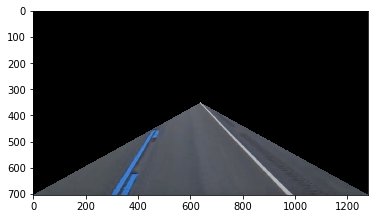

In [104]:
plt.imshow(cropped_image)

## Part 2 - Identify lines on Road using Line Detection

We will use Probabilitstic Hough Transformation, as we worked earlier on Suduko image. To find the edge detection we convert the image to grayscale

In [105]:
image_mask_gray = cv.cvtColor(cropped_image, cv.COLOR_BGR2GRAY)

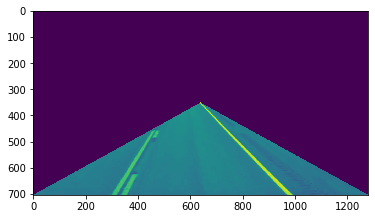

In [106]:
plt.imshow(image_mask_gray)

In [107]:
#use canny edge detection to find the edges.
#values:(image, threshold1, threshold2)

canny_image = cv.Canny(image_mask_gray, 100, 200)

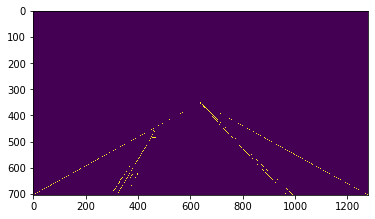

In [108]:
plt.imshow(canny_image)

##### from above image, we can see canny detected the boundary of masked line as well. We not interested in masked lines. 

### So to over come that we will apply Canny Edge detetion BEFORE we find our region of interest. This way we have only lines on road which is line of our interest.

### Also, we will pass the original image instead of cropped/masked image. Go to document 21 B. to see the next process

In [72]:
cv.imshow('masked image', image_mask_gray)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1